In [3]:
import numpy as np

import pandas as pd

## we will do preprocessing

In [4]:
df = pd.read_csv('/content/placement-dataset.csv')
print(df.head())
df.shape
df.info

          city  cgpa   iq  placement
0     New York   6.8  123          1
1  Los Angeles   5.9  106          0
2      Chicago   8.0  121          0
3     New York   7.4  132          1
4  Los Angeles   5.8  142          0


<bound method DataFrame.info of            city  cgpa   iq  placement
0      New York   6.8  123          1
1   Los Angeles   5.9  106          0
2       Chicago   8.0  121          0
3      New York   7.4  132          1
4   Los Angeles   5.8  142          0
..          ...   ...  ...        ...
95      Chicago   4.3  200          0
96     New York   4.4   42          0
97  Los Angeles   6.7  182          1
98      Chicago   6.3  103          1
99     New York   6.2  113          1

[100 rows x 4 columns]>

In [5]:
import matplotlib.pyplot as plt # Corrected the typo 'mateplotlib' to 'matplotlib'


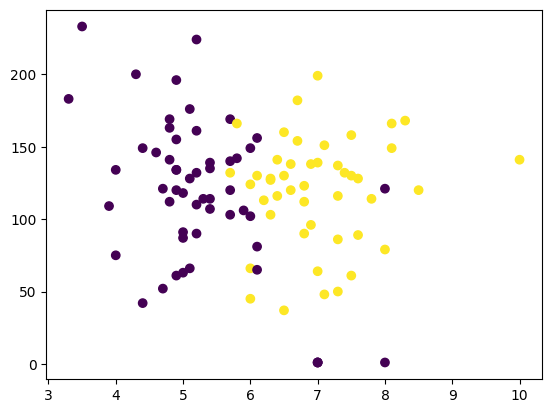

In [6]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

# extract inpute and outpute calls

In [7]:
x= df.iloc[:,[1,2]]
y= df.iloc[:,-1]

In [8]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
train_test_split(x,y,test_size=0.1)

[    cgpa   iq
 15   5.1  176
 4    5.8  142
 18   4.0  134
 55   7.8  114
 1    5.9  106
 ..   ...  ...
 43  10.0  141
 52   7.0    1
 31   3.9  109
 97   6.7  182
 94   4.7   52
 
 [90 rows x 2 columns],
     cgpa   iq
 82   6.5   37
 40   4.9  134
 24   4.7  121
 66   6.9   96
 39   4.6  146
 48   6.6  138
 72   7.3  116
 98   6.3  103
 28   5.2   90
 20   6.6  120,
 15    0
 4     0
 18    0
 55    1
 1     0
      ..
 43    1
 52    0
 31    0
 97    1
 94    0
 Name: placement, Length: 90, dtype: int64,
 82    1
 40    0
 24    0
 66    1
 39    0
 48    1
 72    1
 98    1
 28    0
 20    1
 Name: placement, dtype: int64]

In [10]:


# Assuming 'x' and 'y' are your feature and target data respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Now you can use x_test
print(x_test)

    cgpa   iq
88   4.4  149
23   5.0   87
86   5.1  128
94   4.7   52
0    6.8  123
16   5.2  224
14   5.7  103
78   6.1   81
20   6.6  120
17   3.3  183


In [11]:
y_train

79    0
99    1
63    1
18    0
89    0
     ..
82    1
92    0
7     0
66    1
5     1
Name: placement, Length: 90, dtype: int64

In [12]:
x_test

,cgpa,iq
88,4.4,149
23,5.0,87
86,5.1,128
94,4.7,52
0,6.8,123
16,5.2,224
14,5.7,103
78,6.1,81
20,6.6,120
17,3.3,183


# scale the value

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_test

array([[-1.43219237,  0.68922905],
       [-0.94146656, -0.67359805],
       [-0.85967892,  0.22762632],
       [-1.18682947, -1.44293594],
       [ 0.53071088,  0.11772091],
       [-0.77789129,  2.33781022],
       [-0.36895311, -0.32190074],
       [-0.04180257, -0.80548455],
       [ 0.36713561,  0.05177766],
       [-2.33185636,  1.43658584]])

## training the model

In [29]:
from sklearn.linear_model import LogisticRegression

# Assuming x_train and y_train are your training data
model = LogisticRegression()
model.fit(x_train, y_train)



LogisticRegression()

In [30]:
y_pred = model.predict(x_test)

In [31]:
y_test

88    0
23    0
86    0
94    0
0     1
16    0
14    0
78    0
20    1
17    0
Name: placement, dtype: int64

In [32]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


1.0

In [34]:
!pip install mlxtend

<Axes: >

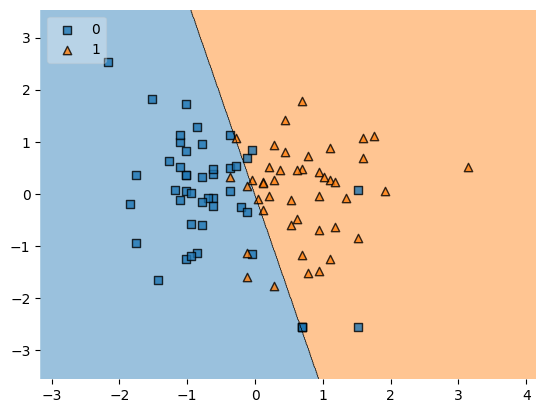

In [35]:
!pip install --upgrade mlxtend

from mlxtend.plotting import plot_decision_regions

# Assuming y_train is a Pandas Series and you want the underlying NumPy array
plot_decision_regions(x_train, y_train.values, clf=model, legend=2) # Use clf instead of model

In [36]:
import pickle


In [37]:

pickle.dump(model,open('model.pkl','wb'))